In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

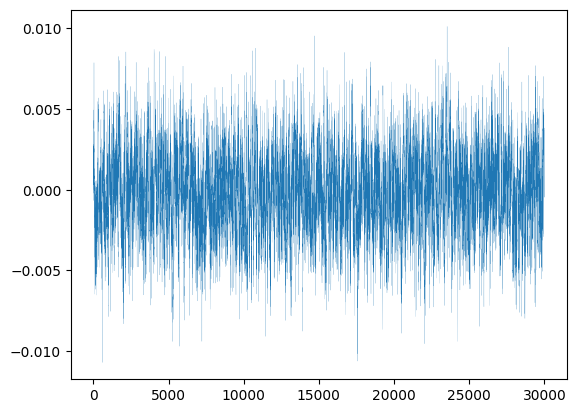

In [59]:
table = pd.read_table('HW4_Data_1.dat',header=None)
table.columns=["velocity"]
plt.plot(table['velocity'],linewidth=0.1)

In [60]:
data=table['velocity']
# Step 2: Calculate the autocorrelation function
def autocorrelation(signal):
    signal = signal - np.mean(signal)
    n = signal.size
    num = np.append(np.linspace(1,n,n),np.linspace(n-1,1,n-1))
    result = np.correlate(signal, signal, mode='full')/num
    result = result[result.size // 2:]  # Take the second half
    #return result / result[0]  # Normalize
    return result

autocorr = autocorrelation(data)

# Step 3: Plot the autocorrelation function
time_lags = np.arange(len(autocorr)) * 20e-6  # 20 us per measurement

In [61]:
# Step 4: Fit an exponential decay to find the decay constant
def exponential_decay(t, a, tau):
    return a * np.exp(-t / tau)
# Fit only the first milliseconds
fit_time = time_lags[time_lags <= 1e-3]
fit_autocorr = autocorr[:len(fit_time)]
popt, _ = curve_fit(exponential_decay, fit_time, fit_autocorr,p0=(1,2e-4))
#initial guess of parameters should be provided
A=popt[0]
A

6.879171937945767e-06

In [62]:

# Extract the decay constant
decay_constant = popt[1]
decay_constant


0.00018985276314534627

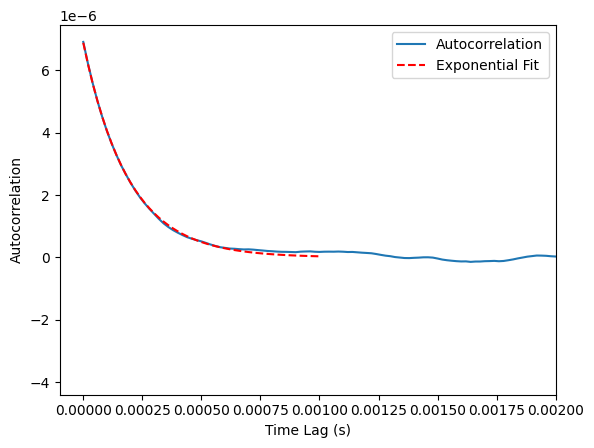

In [63]:
# Plot with fitted curve
plt.plot(time_lags, autocorr, label="Autocorrelation")
plt.plot(fit_time, exponential_decay(fit_time, *popt), 'r--', label="Exponential Fit")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.xlim((-1e-4,2e-3))
plt.show()

$$
\text{autocorrelation}=Ae^{-\frac{t}{\tau}}=\frac{k_BT}{m}e^{-\frac{t}{\frac{m}{\zeta}}}
$$

$$
\tau=\text{Decay Constant}=0.00019 \ \text{s}= 0.19\ \text{ms}
$$

$$
A=\frac{k_BT}{m}=6.88\times 10^{-6}\ \text{cm}^2 \text{s}^{-2}
$$

In [64]:
A=A*1e-4
kb = 1.38e-23
T=300
zeta = kb*T/A/decay_constant
zeta

3.169912354366034e-08

$$
\zeta=\text{friction coefficient} =\frac{m}{\tau}=\frac{k_BT}{A\tau}=3.17\times10^{-8}\ \text{N s/m}
$$


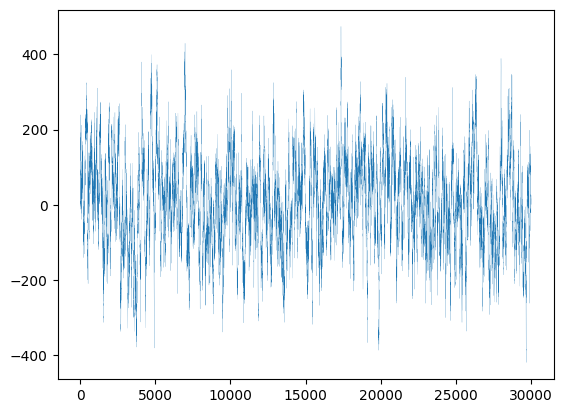

In [65]:
table = pd.read_table('HW4_Data_2.dat',header=None)
table.columns=["displacement"]
plt.plot(table['displacement'],linewidth=0.1)

In [66]:
data=table['displacement']
autocorr = autocorrelation(data)
# Step 3: Plot the autocorrelation function
time_lags = np.arange(len(autocorr)) * 3e-3  # 3 ms per measurement


In [67]:
# Fit only the first milliseconds
fit_time = time_lags[time_lags <= 1]
fit_autocorr = autocorr[:len(fit_time)]
popt, _ = curve_fit(exponential_decay, fit_time, fit_autocorr,p0=(15e3,1e-2))
#initial guess of parameters should be provided
B=popt[0]
decay_constant = popt[1]
B = B*10**(-18)
B,decay_constant

(1.490799651872893e-14, 0.1565925942812811)

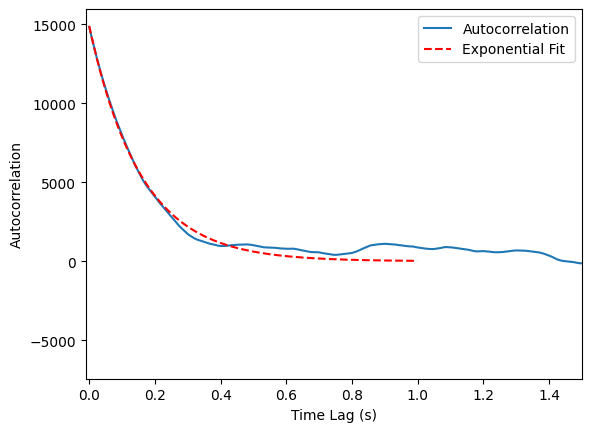

In [68]:
# Plot with fitted curve
plt.plot(time_lags, autocorr, label="Autocorrelation")
plt.plot(fit_time, exponential_decay(fit_time, *popt), 'r--', label="Exponential Fit")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.xlim((-1e-2,1.5))
plt.show()

$$
\text{autocorrelation}=Be^{-\lambda t}=Be^{-\frac{t}{\tau}}=<\Delta x^2>e^{-\lambda t}
$$

$$
\tau=\text{Decay Constant}=0.157 \ \text{s}= 157\ \text{ms}
$$

$$
B=<\Delta x^2>=14908\ \text{nm}^2=1.49\times10^{-14}\ \text{m}^2
$$

The decay constant (if defined as time constant) is much larger than the previous one, which means a slower decay.

In [69]:
((kb*T)/(B*6*np.pi*(1e-3)))*decay_constant

2.307018911105351e-06

$$
R=\frac{k_BT}{<\Delta x^2>\cdot 6\pi \eta}\cdot \frac{1}{\lambda}
=\frac{k_BT}{B\cdot 6\pi \eta}\cdot \tau=2.3\times 10 ^{-6}\ \text{m}
$$